**AIR TRAFFIC OPTIMIZATION**

**Description**:
Collaborative Data Science project   
DevTown Training

By: ***Stuti***


Utilized flight Data Sets from Kaggle: https://www.kaggle.com/datasets/usdot/flight-delays



Development of a Flight Delay Prediction system. In the aviation industry, accurate prediction of flight delays is of paramount importance for both airlines and passengers.

Our project encompassed a comprehensive analysis of historical flight data, including factors such as weather conditions, aircraft maintenance, and flight routes. Employing advanced Data Analytics techniques, including Data Cleaning, Data Visualization, and Machine Learning, our primary goal was to construct a predictive model capable of forecasting flight delays.

The project lifecycle encompassed the following key phases:

1. Data Collection and Preparation: We meticulously gathered and preprocessed a diverse dataset, ensuring data quality and consistency.

2. Exploratory Data Analysis: Our team conducted thorough exploratory data analysis, unveiling critical insights into the causes of flight delays, such as weather-related patterns and high-traffic flight routes.

3. Feature Engineering: We engineered relevant features, such as historical delay patterns, airport congestion levels, and airline-specific factors, to enhance the predictive capabilities of our model.

4. Model Building: Employing a range of Machine Learning algorithms, we constructed predictive models capable of forecasting flight delays with high accuracy.

5. Model Evaluation: To assess model performance, we rigorously evaluated key metrics such as accuracy, precision, recall, and F1-score, ensuring the reliability of our predictions.

IMPORTING LIBRARIES AND LOADING DATA SETS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airport=pd.read_csv(r"/content/airports.csv")

In [ ]:
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
airlines=pd.read_csv(r"/content/airlines.csv")
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


Data Cleaning and Data Preprocessing

In [ ]:
airport['COUNTRY'].unique()

array(['USA'], dtype=object)

In [ ]:
airport.drop('COUNTRY', axis=1, inplace=True)

In [ ]:
airport.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [ ]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [ ]:
airport.fillna(method='ffill',axis=0,inplace=True)

In [ ]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [ ]:
airlines.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [ ]:
airlines.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [ ]:
flights=pd.read_csv(r"/content/flights.csv")
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436034,2015,1,29,4,WN,949,N7719A,BWI,STL,1535,...,1633.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
436035,2015,1,29,4,WN,1048,N8325D,DAL,LAX,1535,...,1650.0,-15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
436036,2015,1,29,4,WN,4818,N230WN,DAL,LBB,1535,...,1657.0,17.0,0.0,0.0,NaN,0.0,0.0,0.0,17.0,0.0
436037,2015,1,29,4,WN,162,N705SW,DCA,BNA,1535,...,1626.0,-19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436039 entries, 0 to 436038
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 436039 non-null  int64  
 1   MONTH                436039 non-null  int64  
 2   DAY                  436039 non-null  int64  
 3   DAY_OF_WEEK          436039 non-null  int64  
 4   AIRLINE              436039 non-null  object 
 5   FLIGHT_NUMBER        436039 non-null  int64  
 6   TAIL_NUMBER          433299 non-null  object 
 7   ORIGIN_AIRPORT       436039 non-null  object 
 8   DESTINATION_AIRPORT  436039 non-null  object 
 9   SCHEDULED_DEPARTURE  436039 non-null  int64  
 10  DEPARTURE_TIME       424618 non-null  float64
 11  DEPARTURE_DELAY      424617 non-null  float64
 12  TAXI_OUT             424406 non-null  float64
 13  WHEELS_OFF           424406 non-null  float64
 14  SCHEDULED_TIME       436038 non-null  float64
 15  ELAPSED_TIME     

In [ ]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
flights.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              2740
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          11421
DEPARTURE_DELAY         11422
TAXI_OUT                11633
WHEELS_OFF              11633
SCHEDULED_TIME              1
ELAPSED_TIME            12633
AIR_TIME                12633
DISTANCE                    1
WHEELS_ON               11991
TAXI_IN                 11991
SCHEDULED_ARRIVAL           1
ARRIVAL_TIME            11991
ARRIVAL_DELAY           12633
DIVERTED                    1
CANCELLED                   1
CANCELLATION_REASON    424309
AIR_SYSTEM_DELAY       345784
SECURITY_DELAY         345784
AIRLINE_DELAY          345784
LATE_AIRCRAFT_DELAY    345784
WEATHER_DELAY          345784
dtype: int64

In [ ]:
flights.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1,inplace=True)

In [ ]:
flights.fillna(method='ffill',inplace=True)

In [ ]:
flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [ ]:
flights.drop(['YEAR'],axis=1,inplace=True)

In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436039 entries, 0 to 436038
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                436039 non-null  int64  
 1   DAY                  436039 non-null  int64  
 2   DAY_OF_WEEK          436039 non-null  int64  
 3   AIRLINE              436039 non-null  object 
 4   FLIGHT_NUMBER        436039 non-null  int64  
 5   TAIL_NUMBER          436039 non-null  object 
 6   ORIGIN_AIRPORT       436039 non-null  object 
 7   DESTINATION_AIRPORT  436039 non-null  object 
 8   SCHEDULED_DEPARTURE  436039 non-null  int64  
 9   DEPARTURE_TIME       436039 non-null  float64
 10  DEPARTURE_DELAY      436039 non-null  float64
 11  TAXI_OUT             436039 non-null  float64
 12  WHEELS_OFF           436039 non-null  float64
 13  SCHEDULED_TIME       436039 non-null  float64
 14  ELAPSED_TIME         436039 non-null  float64
 15  AIR_TIME         

Integrating the flights, Airlines and Airports data sets

In [ ]:
df_integrated = pd.merge(flights, airlines, left_on="AIRLINE", right_on="IATA_CODE")
df_integrated.drop(['IATA_CODE','AIRLINE_x'], axis=1, inplace=True)
df_integrated.rename(columns={"AIRLINE_y": "AIRLINE"}, inplace =True)

In [ ]:
df_integrated

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE
0,1,1,4,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,Alaska Airlines Inc.
1,1,1,4,135,N527AS,SEA,ANC,25,24.0,-1.0,...,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,Alaska Airlines Inc.
2,1,1,4,108,N309AS,ANC,SEA,45,41.0,-4.0,...,173.0,1448.0,451.0,4.0,509.0,455.0,-14.0,0.0,0.0,Alaska Airlines Inc.
3,1,1,4,122,N413AS,ANC,PDX,50,46.0,-4.0,...,187.0,1542.0,504.0,3.0,525.0,507.0,-18.0,0.0,0.0,Alaska Airlines Inc.
4,1,1,4,130,N457AS,FAI,SEA,115,107.0,-8.0,...,186.0,1533.0,538.0,7.0,548.0,545.0,-3.0,0.0,0.0,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436034,1,29,4,958,N852VA,SFO,SAN,1505,1501.0,-4.0,...,72.0,447.0,1632.0,5.0,1630.0,1637.0,7.0,0.0,0.0,Virgin America
436035,1,29,4,262,N848VA,LAS,BOS,1530,1536.0,6.0,...,260.0,2381.0,2315.0,4.0,2320.0,2319.0,-1.0,0.0,0.0,Virgin America
436036,1,29,4,475,N849VA,LAS,LAX,1530,1525.0,-5.0,...,44.0,236.0,1627.0,7.0,1640.0,1634.0,-6.0,0.0,0.0,Virgin America
436037,1,29,4,932,N842VA,SFO,LAX,1530,1526.0,-4.0,...,56.0,337.0,1635.0,7.0,1650.0,1642.0,-8.0,0.0,0.0,Virgin America


In [ ]:
df_integrated_origin = pd.merge(df_integrated, airport, left_on="ORIGIN_AIRPORT", right_on="IATA_CODE")
df_integrated_origin.drop(['ORIGIN_AIRPORT','IATA_CODE'], axis=1, inplace=True)

In [ ]:
df_integrated_origin.rename(columns={"AIRPORT": "ORIGIN_AIRPORT", "CITY": "ORIGIN_CITY", "STATE": "ORIGIN_STATE", "LATITUDE": "ORIGIN_LATITUDE", "LONGITUDE": "ORIGIN_LONGITUDE"}, inplace=True)

In [ ]:
df_full_integration = pd.merge(df_integrated_origin, airport, left_on="DESTINATION_AIRPORT", right_on="IATA_CODE")
df_full_integration.drop(['DESTINATION_AIRPORT','IATA_CODE'], axis=1, inplace=True)

In [ ]:
df_full_integration.rename(columns={"AIRPORT": "DEST_AIRPORT", "CITY": "DEST_CITY", "STATE": "DEST_STATE", "LATITUDE": "DEST_LATITUDE", "LONGITUDE": "DEST_LONGITUDE"}, inplace=True)
df_full_integration

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE
0,1,1,4,98,N407AS,5,2354.0,-11.0,21.0,15.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,1,1,4,108,N309AS,45,41.0,-4.0,17.0,58.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
2,1,1,4,136,N431AS,135,116.0,-11.0,10.0,126.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
3,1,1,4,134,N464AS,155,140.0,-15.0,17.0,157.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
4,1,1,4,114,N303AS,220,209.0,-11.0,15.0,224.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436034,1,27,2,2570,N880AS,1440,1426.0,-14.0,8.0,1434.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
436035,1,27,2,2571,N879AS,2102,2031.0,-31.0,14.0,2045.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
436036,1,28,3,2570,N879AS,1440,1443.0,3.0,14.0,1457.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
436037,1,28,3,2571,N905EV,2102,2036.0,-26.0,9.0,2045.0,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706


**DATA VISUALISATION OF THE FULLY INTEGRATED DATA SET**

*Number of flights per Airline in the USA*

<Axes: title={'center': 'Flight Volume by Airline'}, xlabel='AIRLINE'>

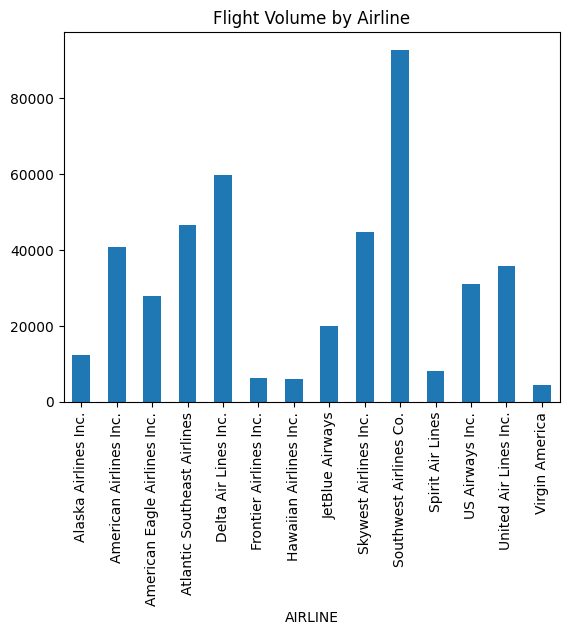

In [ ]:
*Number of flights per Airline in the USA*

*Top 10 flight routes*

In [ ]:
most_popular_routes = df_full_integration.groupby(['ORIGIN_AIRPORT', 'DEST_AIRPORT']).size().nlargest(10)
print(most_popular_routes)

ORIGIN_AIRPORT                                                          DEST_AIRPORT                                                          
Los Angeles International Airport                                       John F. Kennedy International Airport (New York International Airport)    1064
John F. Kennedy International Airport (New York International Airport)  Los Angeles International Airport                                         1061
San Francisco International Airport                                     Los Angeles International Airport                                         1030
Los Angeles International Airport                                       San Francisco International Airport                                       1016
McCarran International Airport                                          Los Angeles International Airport                                          883
Los Angeles International Airport                                       McCarran International Airport

*Analyzing the proportion of flights with respect to the companies*

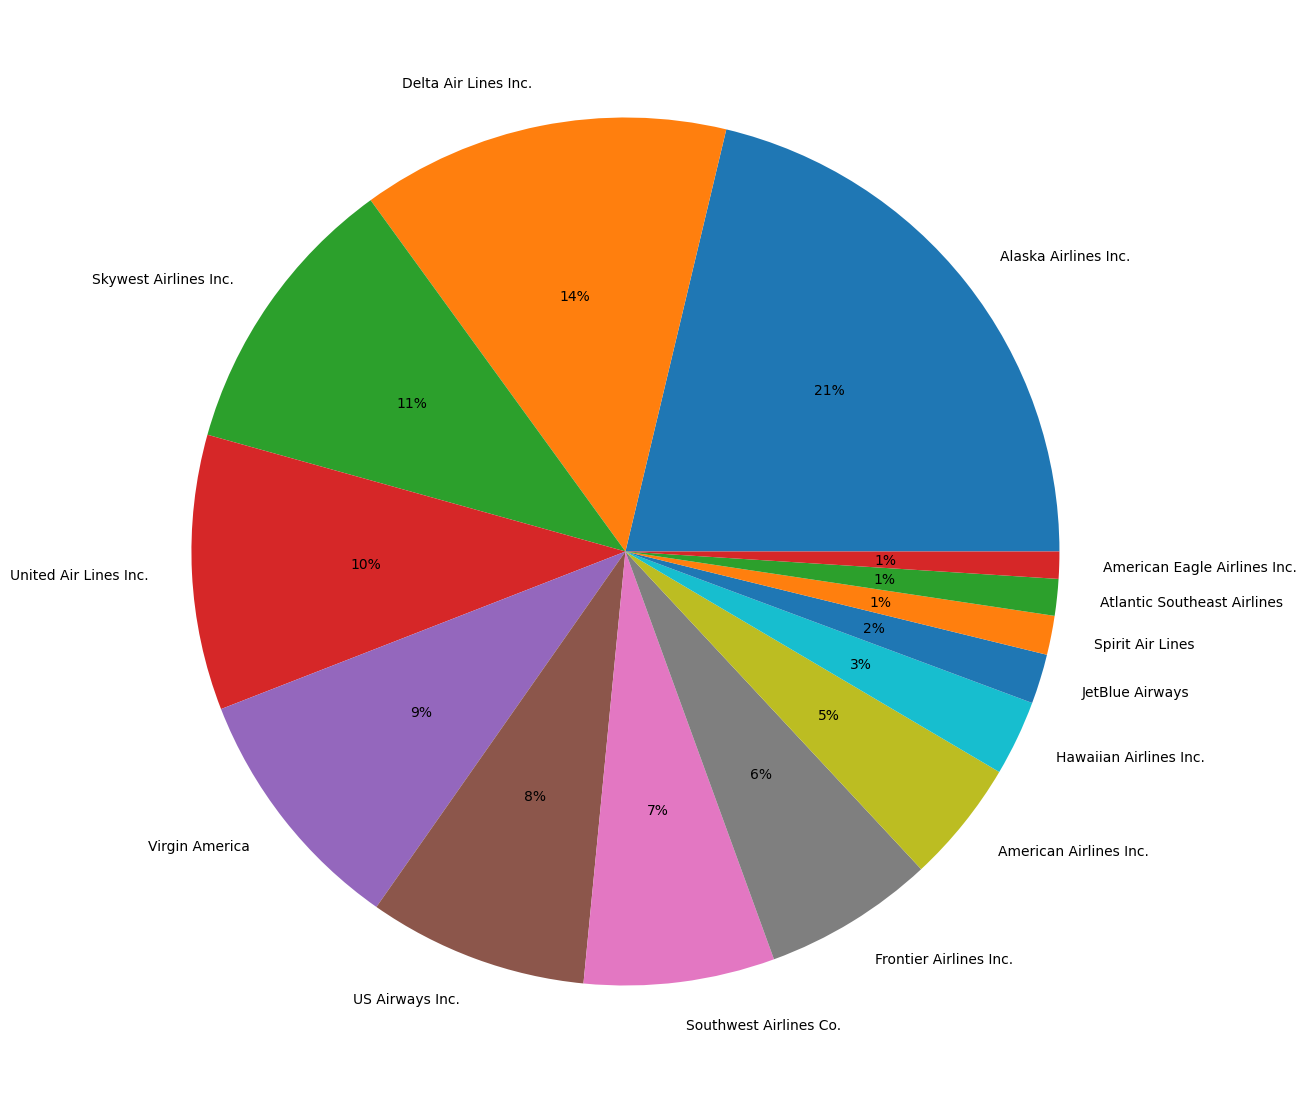

In [ ]:
fig_dim = (14,18)
f, ax = plt.subplots(figsize=fig_dim)
quality=df_full_integration["AIRLINE"].unique()
size=df_full_integration["AIRLINE"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

*Visualizing The Flight Delays of Airlines*

In [ ]:
df_full_integration['DELAYED'] = df_full_integration.loc[:,'ARRIVAL_DELAY'].values > 0

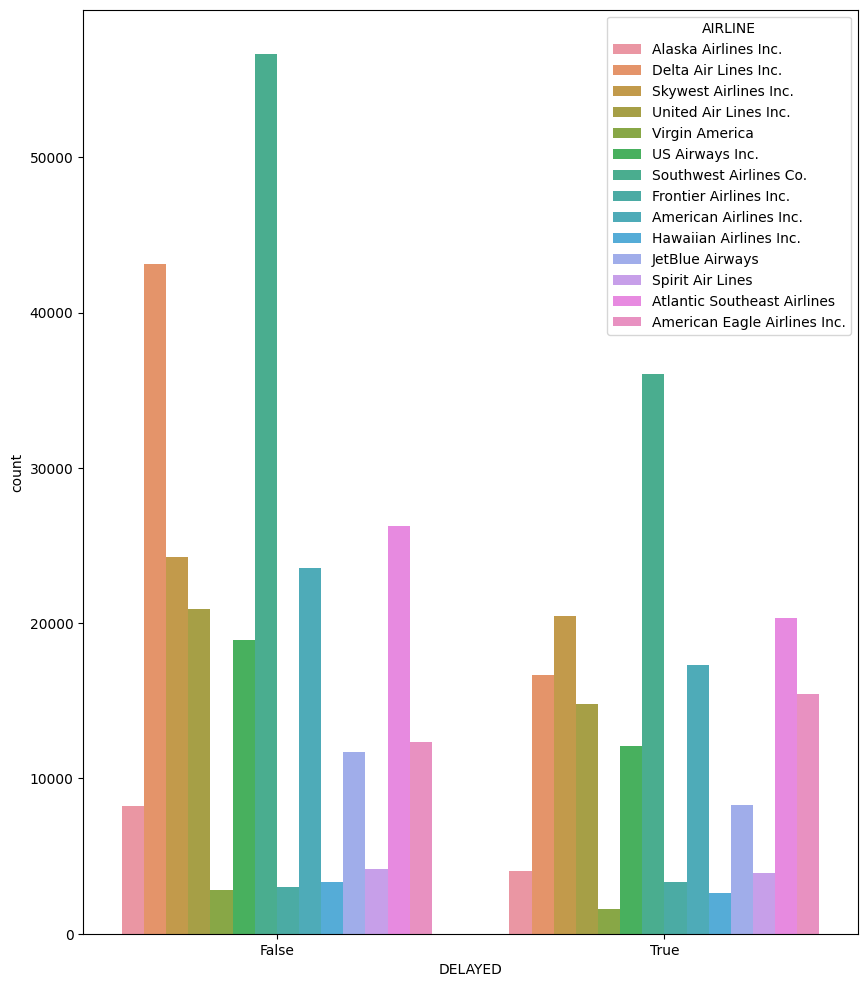

In [ ]:
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue='AIRLINE',data=df_full_integration)
plt.show()

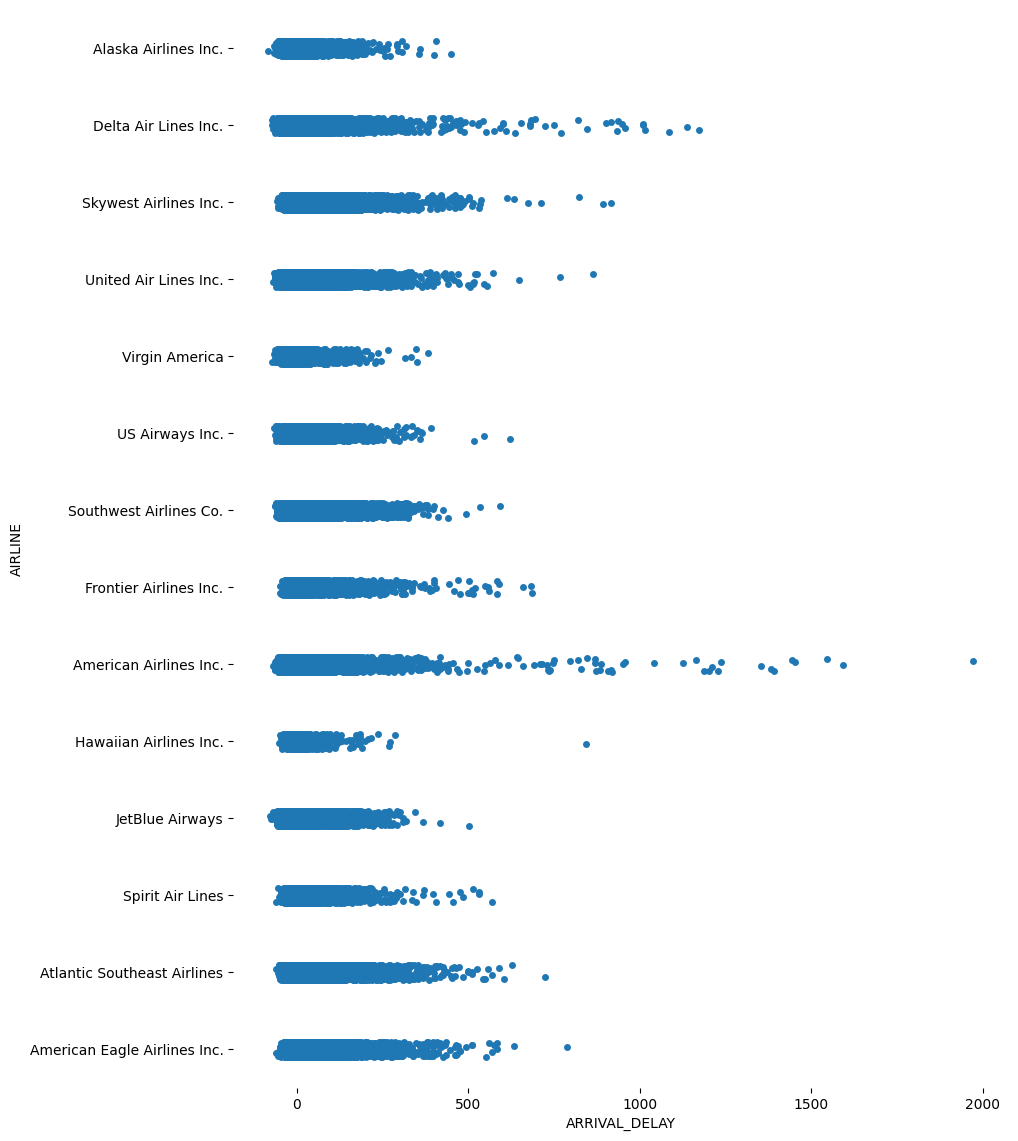

In [ ]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)

# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE", data = df_full_integration, dodge=True, jitter=True )
plt.show()

*Monthly Trend Of Flights Count in the USA in 2015*

<ipython-input-45-17ddfd95e432>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


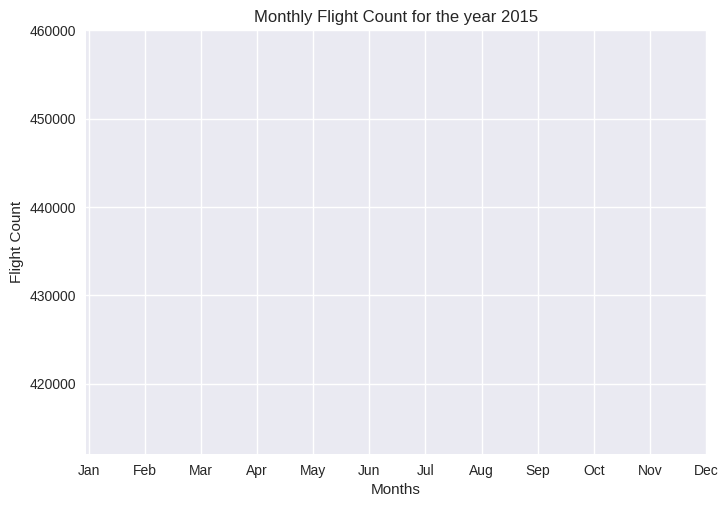

In [ ]:
plt.style.use('seaborn')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_full_integration.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("Months")
plt.xticks(labels=labels, ticks=np.arange(1,13,1))
plt.ylabel("Flight Count")
plt.title("Monthly Flight Count for the year 2015")
plt.show()

*Independent and Dependent Features Correlation Chart*

<ipython-input-46-74215107afe9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full_integration.corr(),annot = True)


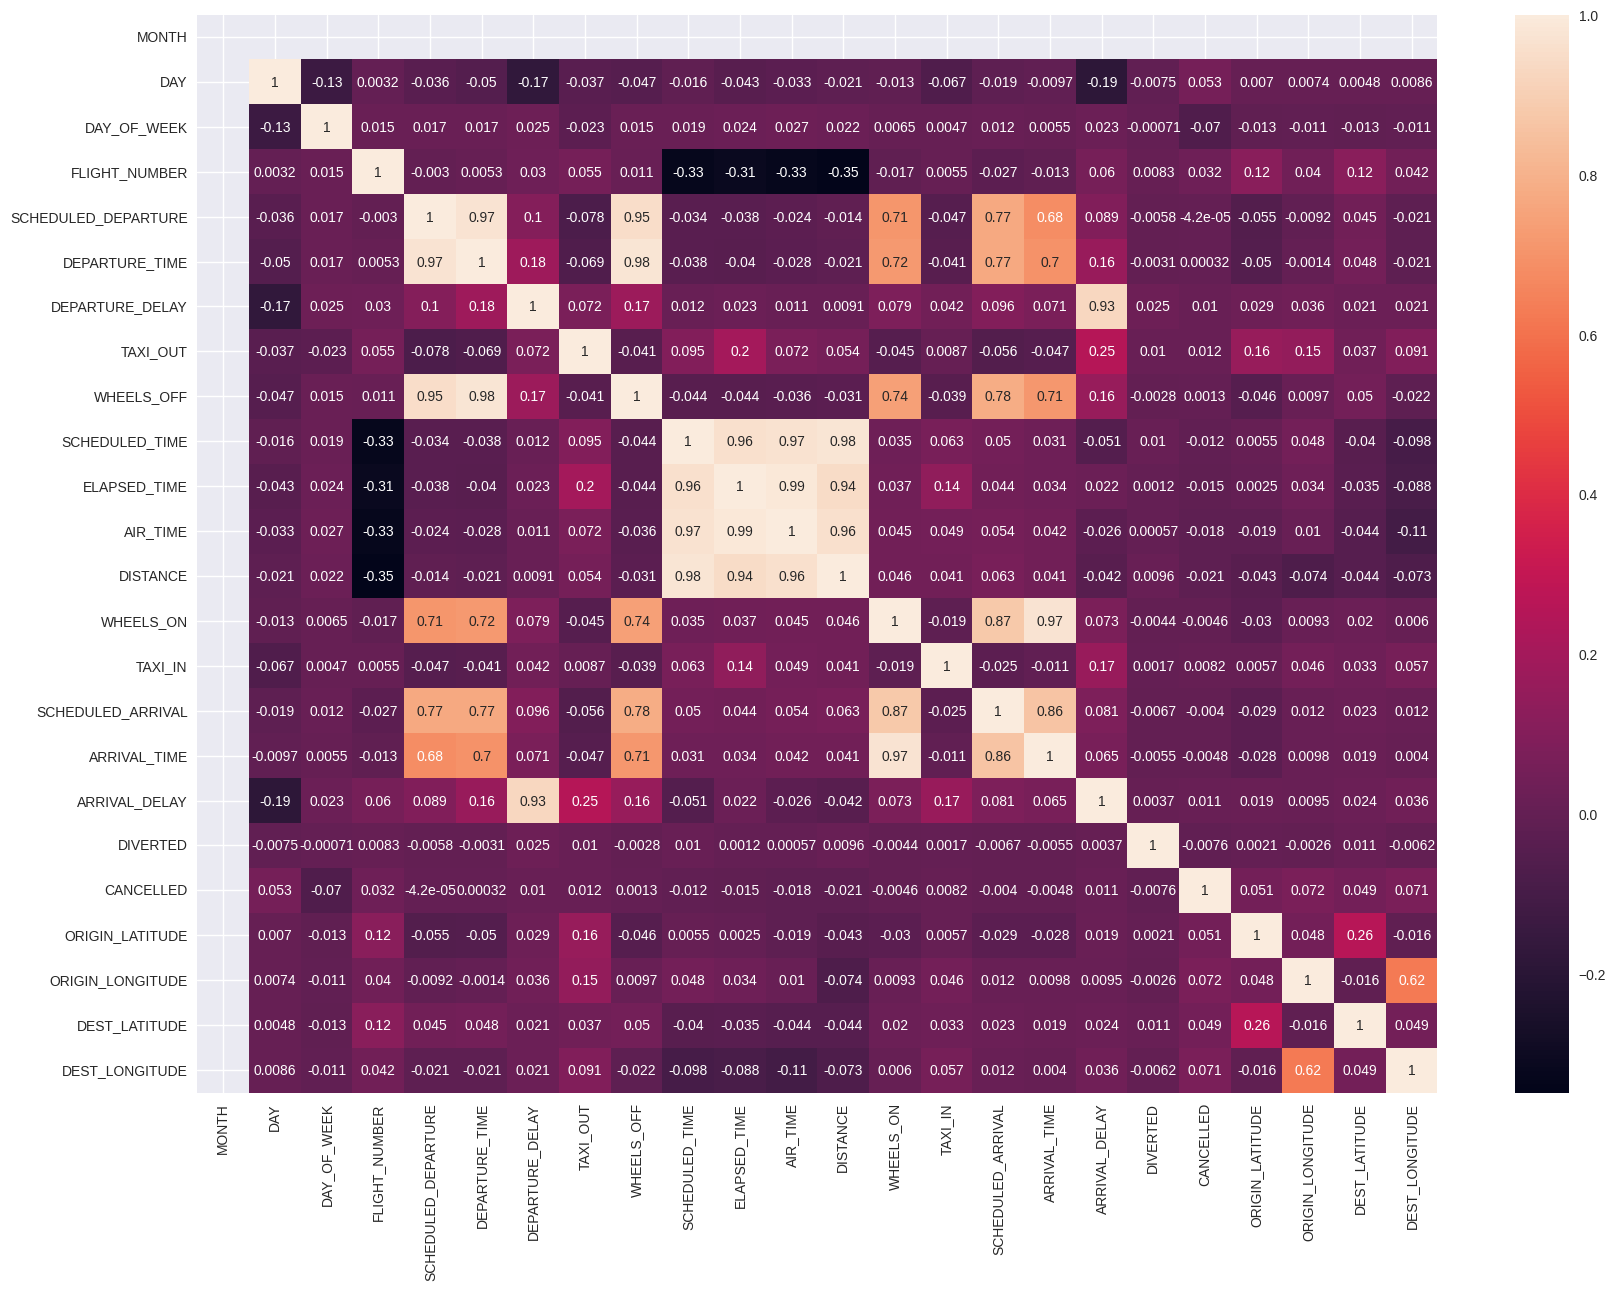

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(df_full_integration.corr(),annot = True)
plt.show()

**Insights After Data Analysis and Visualization**:

1.   Southwest Airlines Co. has max Flight Volume
2.   Virgin America has min Flight Volume
3.   The most popular route is from San Francisco International Airport to Los
     Angeles International Airport
4.   Average Departure Delay: 9.774567640166886 minutes
5.   Spirit Airlines has max average delay
6.   The airline with the most flights is Southwest Airlines Co. with 1157339
     flights.
7.   Alaska Airlines Inc has max ontime departures









**FEATURE ENGINEERING AND ENCODING**

In [ ]:
df_full_integration.head(10)

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CITY_x,STATE_x,LATITUDE_x,LONGITUDE_x,AIRPORT_y,CITY_y,STATE_y,LATITUDE_y,LONGITUDE_y,DELAYED
0,1,1,4,98,N407AS,5,2354.0,-11.0,21.0,15.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
1,1,1,4,108,N309AS,45,41.0,-4.0,17.0,58.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
2,1,1,4,136,N431AS,135,116.0,-11.0,10.0,126.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
3,1,1,4,134,N464AS,155,140.0,-15.0,17.0,157.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
4,1,1,4,114,N303AS,220,209.0,-11.0,15.0,224.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
5,1,1,4,730,N423AS,505,457.0,-8.0,16.0,513.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
6,1,1,4,112,N527AS,700,653.0,-7.0,16.0,709.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
7,1,1,4,80,N431AS,1035,1027.0,-8.0,21.0,1048.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
8,1,1,4,120,N528AS,1340,1330.0,-10.0,18.0,1348.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False
9,1,1,4,92,N592AS,1430,1424.0,-6.0,7.0,1431.0,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,False


In [ ]:
# Drop all columns that will not add interpretability to the model based on the correlation matrix
df_full_integration = df_full_integration.drop(['DAY','FLIGHT_NUMBER', 'TAXI_OUT','SCHEDULED_DEPARTURE','WHEELS_OFF','WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL','DIVERTED','CANCELLED','DELAYED','DEST_CITY', 'DEST_STATE', 'DEST_LATITUDE', 'DEST_LONGITUDE','ORIGIN_CITY','ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE','TAIL_NUMBER'], axis=1)

In [ ]:
df_full_integration.head(10)

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DEST_AIRPORT
0,1,4,2354.0,-11.0,205.0,194.0,169.0,1448.0,408.0,-22.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
1,1,4,41.0,-4.0,204.0,194.0,173.0,1448.0,455.0,-14.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
2,1,4,116.0,-11.0,205.0,234.0,217.0,1448.0,710.0,-16.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
3,1,4,140.0,-15.0,218.0,198.0,170.0,1448.0,558.0,-35.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
4,1,4,209.0,-11.0,200.0,199.0,176.0,1448.0,628.0,-12.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
5,1,4,457.0,-8.0,205.0,199.0,179.0,1448.0,916.0,-14.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
6,1,4,653.0,-7.0,210.0,202.0,179.0,1448.0,1115.0,-15.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
7,1,4,1027.0,-8.0,207.0,206.0,180.0,1448.0,1453.0,-9.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
8,1,4,1330.0,-10.0,195.0,195.0,171.0,1448.0,1745.0,-10.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
9,1,4,1424.0,-6.0,200.0,189.0,175.0,1448.0,1833.0,-17.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport


In [ ]:
df_full_integration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436039 entries, 0 to 436038
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MONTH            436039 non-null  int64  
 1   DAY_OF_WEEK      436039 non-null  int64  
 2   DEPARTURE_TIME   436039 non-null  float64
 3   DEPARTURE_DELAY  436039 non-null  float64
 4   SCHEDULED_TIME   436039 non-null  float64
 5   ELAPSED_TIME     436039 non-null  float64
 6   AIR_TIME         436039 non-null  float64
 7   DISTANCE         436039 non-null  float64
 8   ARRIVAL_TIME     436039 non-null  float64
 9   ARRIVAL_DELAY    436039 non-null  float64
 10  AIRLINE          436039 non-null  object 
 11  ORIGIN_AIRPORT   436039 non-null  object 
 12  DEST_AIRPORT     436039 non-null  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 46.6+ MB


In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [ ]:
features_to_encode = ['AIRLINE','ORIGIN_AIRPORT','DEST_AIRPORT']

df_enc = encode_and_bind(df_full_integration, features_to_encode[0])
df_enc = encode_and_bind(df_enc, features_to_encode[1])
df_enc = encode_and_bind(df_enc, features_to_encode[2])

df_enc.head()

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,...,DEST_AIRPORT_William P. Hobby Airport,DEST_AIRPORT_Wilmington Airport,DEST_AIRPORT_Wilmington International Airport,DEST_AIRPORT_Worcester Regional Airport,DEST_AIRPORT_Wrangell Airport,DEST_AIRPORT_Yakutat Airport,DEST_AIRPORT_Yampa Valley Airport (Yampa Valley Regional),DEST_AIRPORT_Yeager Airport,DEST_AIRPORT_Yellowstone Regional Airport,DEST_AIRPORT_Yuma International Airport
0,1,4,2354.0,-11.0,205.0,194.0,169.0,1448.0,408.0,-22.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,41.0,-4.0,204.0,194.0,173.0,1448.0,455.0,-14.0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,116.0,-11.0,205.0,234.0,217.0,1448.0,710.0,-16.0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,140.0,-15.0,218.0,198.0,170.0,1448.0,558.0,-35.0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,209.0,-11.0,200.0,199.0,176.0,1448.0,628.0,-12.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436039 entries, 0 to 436038
Columns: 648 entries, MONTH to DEST_AIRPORT_Yuma International Airport
dtypes: float64(8), int64(2), uint8(638)
memory usage: 301.9 MB


*Importing Packages and Libraries For Training and Testing Various Machine Learning Models*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model
from sklearn.preprocessing import StandardScaler
##import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

***Utilizing Supervised Machine Learning Algorithms to Predict Flight Delays***

In [ ]:
y = df_enc['DEPARTURE_DELAY'].copy()
X = df_enc.drop('DEPARTURE_DELAY', axis=1).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=300)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=300)

*LINEAR REGRESSION*

In [ ]:
lm = LinearRegression()
L_model = lm.fit(X_train,y_train)
L_predictions = pd.DataFrame(lm.predict(X_valid))
print(L_predictions.head(50))
print("MSE =", metrics.mean_squared_error(L_predictions, y_valid))

             0
0    -8.941297
1    -7.005010
2    -4.776210
3    -6.836041
4    -5.044761
5    12.449884
6    -7.776282
7    -2.018441
8     1.817491
9     8.936536
10   -1.202653
11   13.743338
12   -1.062671
13    1.100547
14  -26.384414
15   13.480724
16   -3.029625
17   -5.480518
18   -8.570431
19   38.014060
20    1.027274
21   -2.468646
22  -13.282160
23  -10.463902
24    5.525010
25    9.298588
26    3.934345
27    2.374666
28    1.728338
29   -3.620536
30    9.017907
31   -4.608007
32   -7.749938
33  -19.368714
34   14.381046
35   14.434940
36   29.946177
37    8.750794
38   23.975568
39   -4.429220
40  119.675968
41    0.115678
42   10.785452
43   88.091770
44   -5.461680
45  -12.052546
46   -6.083632
47    9.382563
48    0.950624
49   43.316911
MSE = 72.58312724704601


*Decision Tree Regressor*

In [ ]:
DT_regr = DecisionTreeRegressor(max_depth=3, random_state=369)
DT_model = DT_regr.fit(X_train,y_train)
DT_predictions = pd.DataFrame(DT_regr.predict(X_valid))
print(DT_predictions.head(50))
print("MSE =", metrics.mean_squared_error(DT_predictions, y_valid))

            0
0   -2.274979
1   -2.274979
2   -2.274979
3   -2.274979
4   -2.274979
5   -2.274979
6   -2.274979
7   -2.274979
8   -2.274979
9   -2.274979
10  -2.274979
11  52.560504
12  -2.274979
13  -2.274979
14  -2.274979
15  -2.274979
16  -2.274979
17  -2.274979
18  -2.274979
19  27.682162
20   8.922976
21  -2.274979
22  -2.274979
23  -2.274979
24  -2.274979
25  -2.274979
26  -2.274979
27  -2.274979
28  -2.274979
29  -2.274979
30  -2.274979
31  -2.274979
32  -2.274979
33  -2.274979
34  -2.274979
35  -2.274979
36  27.682162
37   8.922976
38   8.922976
39   8.922976
40  89.941465
41  -2.274979
42  -2.274979
43  89.941465
44  -2.274979
45  -2.274979
46  -2.274979
47  -2.274979
48   8.922976
49  27.682162
MSE = 191.87680152790387


In [ ]:
DT_accuracy = DT_model.score(X_valid, y_valid)
print('DT Accuracy = '+ str(DT_accuracy.round(2)))

DT Accuracy = 0.96


*Optimizing Decision Tree Depth*

Text(0.5, 0, 'max depth')

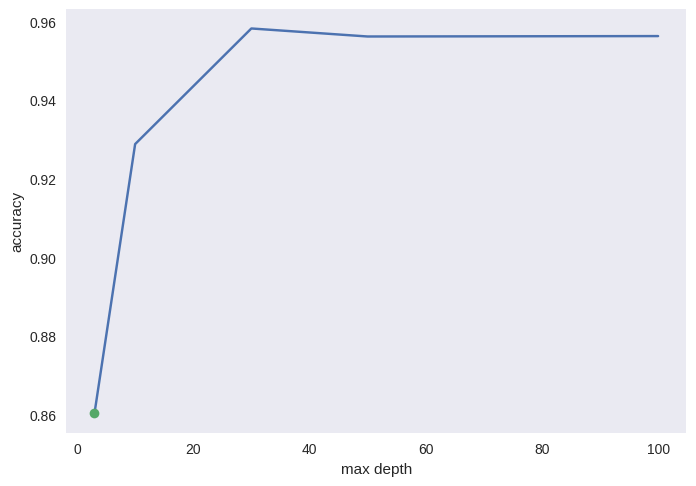

In [ ]:
from sklearn.metrics import accuracy_score
max_depth_list = [3,10,30,50,100]

accuracy = []

for x in max_depth_list:
    dtc = DecisionTreeRegressor(max_depth=x)
    dtc.fit(X_train, y_train)
    accuracy.append(dtc.score(X_valid, y_valid))

plt.plot(max_depth_list, accuracy)
plt.plot(max_depth_list[0], accuracy[0], marker='o')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('max depth')

In [ ]:
DT_regr = DecisionTreeRegressor(max_depth=200, random_state=369)
DT_model = DT_regr.fit(X_train,y_train)
DT_predictions = pd.DataFrame(DT_regr.predict(X_test))
print("MSE =", metrics.mean_squared_error(DT_predictions, y_test))
DT_accuracy = DT_model.score(X_test, y_test)
print('DT Accuracy on Test Set = '+ str(DT_accuracy.round(2)))

MSE = 77.3946541601688
DT Accuracy on Test Set = 0.95


***Exploring The Decision Tree Classifier***

In [ ]:
df = df_full_integration.copy()


In [ ]:
#Create new classifier
df['DELAY'] = [1 if x > -7 else 0 for x in df['DEPARTURE_DELAY']]

In [ ]:
df.tail(10)

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DEST_AIRPORT,DELAY
436029,1,5,2052.0,-10.0,33.0,30.0,19.0,69.0,2122.0,-13.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0
436030,1,6,2044.0,-18.0,33.0,37.0,20.0,69.0,2121.0,-14.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0
436031,1,7,2056.0,-6.0,33.0,27.0,19.0,69.0,2123.0,-12.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0
436032,1,1,1427.0,-13.0,34.0,37.0,20.0,69.0,1504.0,-10.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0
436033,1,1,2110.0,8.0,33.0,29.0,19.0,69.0,2139.0,4.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,1
436034,1,2,1426.0,-14.0,34.0,26.0,15.0,69.0,1452.0,-22.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0
436035,1,2,2031.0,-31.0,33.0,39.0,20.0,69.0,2110.0,-25.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0
436036,1,3,1443.0,3.0,34.0,38.0,20.0,69.0,1521.0,7.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,1
436037,1,3,2036.0,-26.0,33.0,36.0,23.0,69.0,2112.0,-23.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0
436038,1,4,1423.0,-17.0,34.0,29.0,17.0,69.0,1452.0,-22.0,Atlantic Southeast Airlines,Meridian Regional Airport,Hattiesburg-Laurel Regional Airport,0


In [ ]:
# Re-encode
features_to_encode = ['AIRLINE','ORIGIN_AIRPORT','DEST_AIRPORT']

df_enco = encode_and_bind(df, features_to_encode[0])
df_enco = encode_and_bind(df_enco, features_to_encode[1])
df_enco = encode_and_bind(df_enco, features_to_encode[2])

df_enco.head()

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,...,DEST_AIRPORT_William P. Hobby Airport,DEST_AIRPORT_Wilmington Airport,DEST_AIRPORT_Wilmington International Airport,DEST_AIRPORT_Worcester Regional Airport,DEST_AIRPORT_Wrangell Airport,DEST_AIRPORT_Yakutat Airport,DEST_AIRPORT_Yampa Valley Airport (Yampa Valley Regional),DEST_AIRPORT_Yeager Airport,DEST_AIRPORT_Yellowstone Regional Airport,DEST_AIRPORT_Yuma International Airport
0,1,4,2354.0,-11.0,205.0,194.0,169.0,1448.0,408.0,-22.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,41.0,-4.0,204.0,194.0,173.0,1448.0,455.0,-14.0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,116.0,-11.0,205.0,234.0,217.0,1448.0,710.0,-16.0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,140.0,-15.0,218.0,198.0,170.0,1448.0,558.0,-35.0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,209.0,-11.0,200.0,199.0,176.0,1448.0,628.0,-12.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Resplit data
y = df_enco['DELAY'].copy()
X = df_enco.drop('DELAY', axis=1).copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=300)

#Validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.7, random_state=300)

Test Accuracy: 100.00%


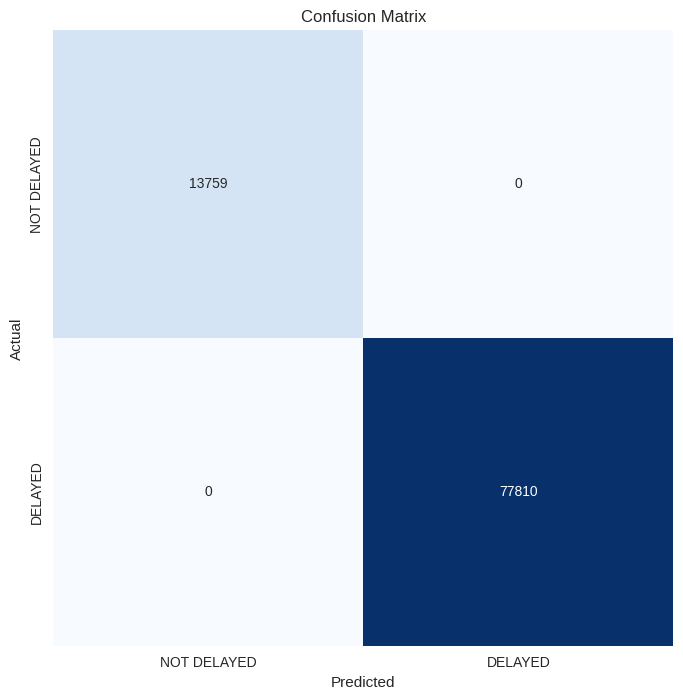

Classification Report:
----------------------
               precision    recall  f1-score   support

 NOT DELAYED       1.00      1.00      1.00     13759
     DELAYED       1.00      1.00      1.00     77810

    accuracy                           1.00     91569
   macro avg       1.00      1.00      1.00     91569
weighted avg       1.00      1.00      1.00     91569



In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
model_acc = model.score(X_valid, y_valid)
print("Test Accuracy: {:.2f}%".format(model_acc * 100))

y_true = np.array(y_valid)
y_pred = model.predict(X_valid)

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=["NOT DELAYED", "DELAYED"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Text(0.5, 0, 'max depth')

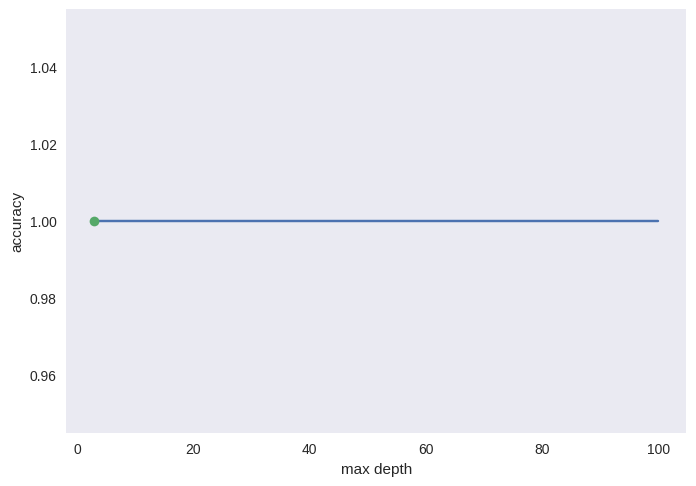

The Decision Tree Classifier is not a good alternative from the results obtained